# Context

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The classes are ordered and not balanced (e.g. there are  much more normal wines than excellent or poor ones).

### Problem Statement:
    


### Dataset
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)


### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

    
   12 - quality: score between 0 and 10 - Output variable (based on sensory data)


### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
wine = pd.read_csv('winequality.csv',sep=';')

In [3]:
# copying data to another varaible to avoid any changes to original data
data = wine.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Understand the shape of the dataset.

In [6]:
data.shape

(1599, 12)

* The dataset has 1599 rows and 12 columns

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observations-**
* All features are numeric type.
* There are no missing values in the data.

### Summary of the dataset.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Observations-**
* No wine has been rated 10 out of 10 the maximum score is 8 and minimum score is 3.
* There are outliers in data where the wines have high sulfur dioxide (free sulphur dioxide and total sulfur dioxide) content as there is a big difference in 3rd quartile and maximum values.
* Most wines are on a pH scale between 3 and 4.

### EDA

### Univariate analysis

In [9]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on fixed acidity

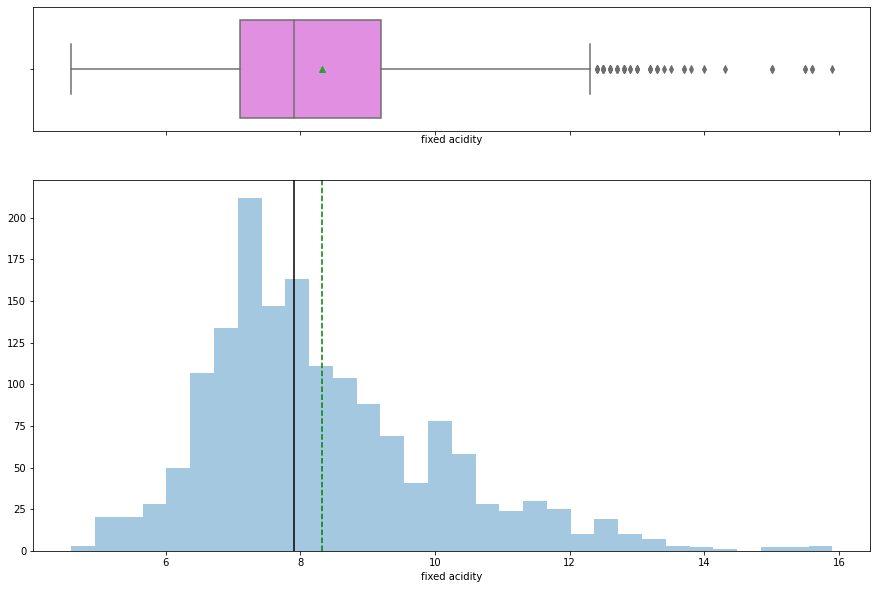

In [10]:
histogram_boxplot(data['fixed acidity'])

* The mean and median values are close toh 8 g/dm^3
* There are outliers present in this variable to the right indicating some wines have higher acidity than others.

### Observations on volatile acidity

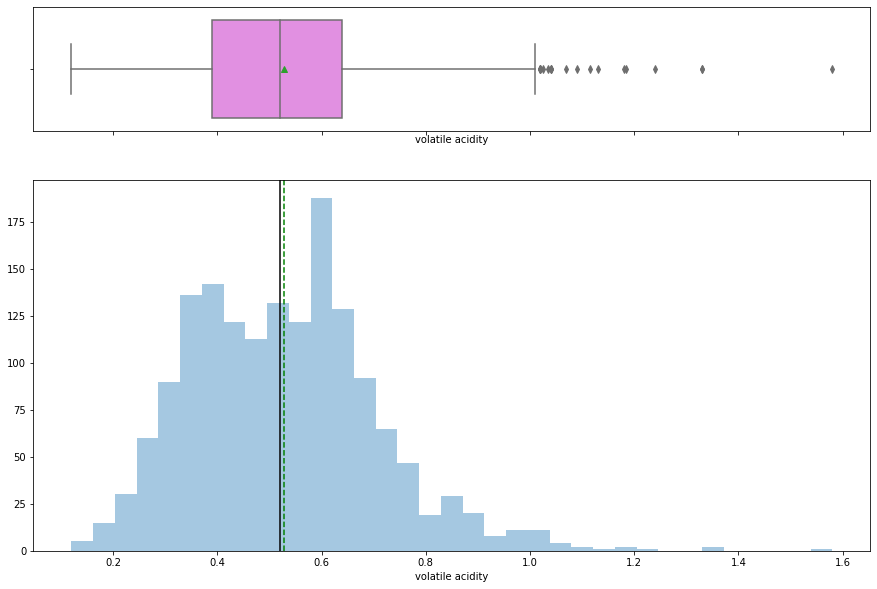

In [11]:
histogram_boxplot(data['volatile acidity'])

* Volatile acidity has a fairly normal distribution with mean and median equal to 0.5.
* Some wines have higher amount of acetic acid that would result in a vinegar like taste of wine, possibly such wines would be of rated lower in quality.

### Observations on citric acid

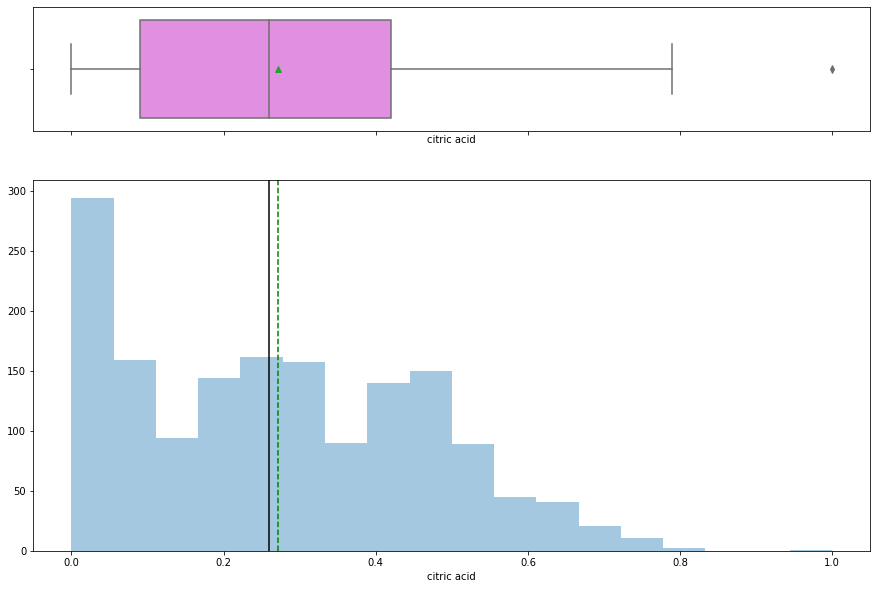

In [12]:
histogram_boxplot(data['citric acid'])

* citric acidity has a slightly right skewed istribution with mean and median equal to 0.25.

### Observations on residual sugar

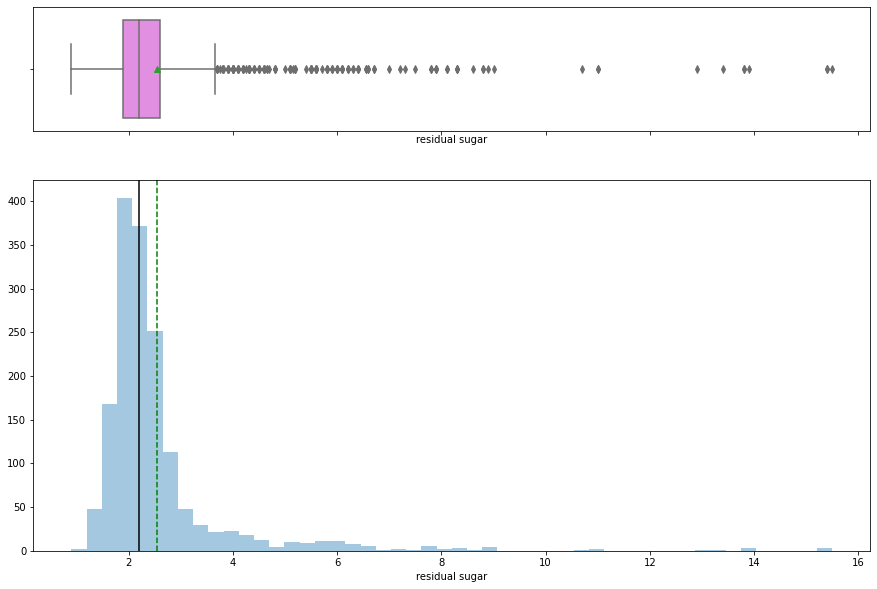

In [13]:
histogram_boxplot(data['residual sugar'])

* There are outliers in this variable.
* Lesser residual sugar wines(< 1) are rare and we have many data points concentrated around 1.5 - 2.5 g/dm^3, wines with very less residual sugar would possibly be rated higher if such wines are rare.

### Observations on chlorides

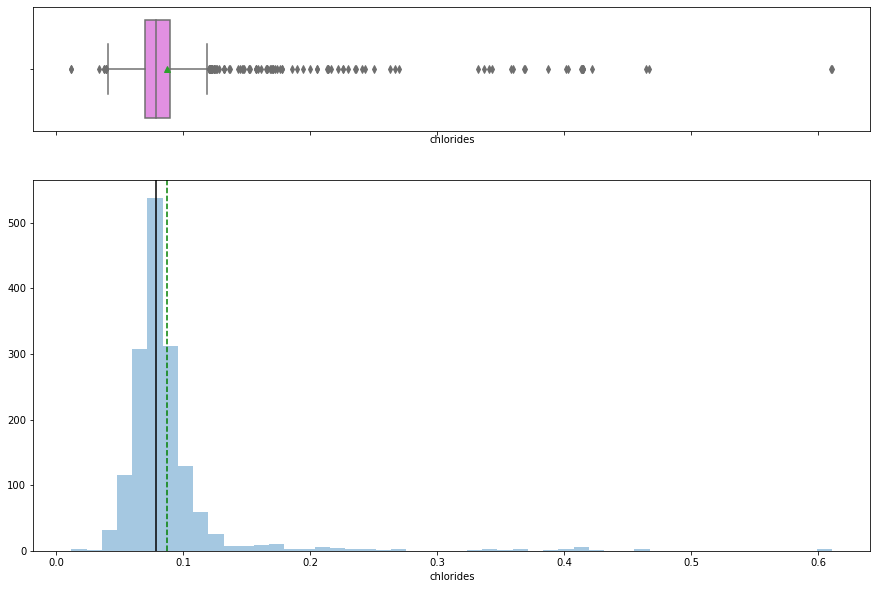

In [14]:
histogram_boxplot(data['chlorides'])

* chlorides has a fairly normal distribution.
* From boxplot, we can see that there are outliers on both the sides of whiskers.

### Observations on free sulfur dioxide

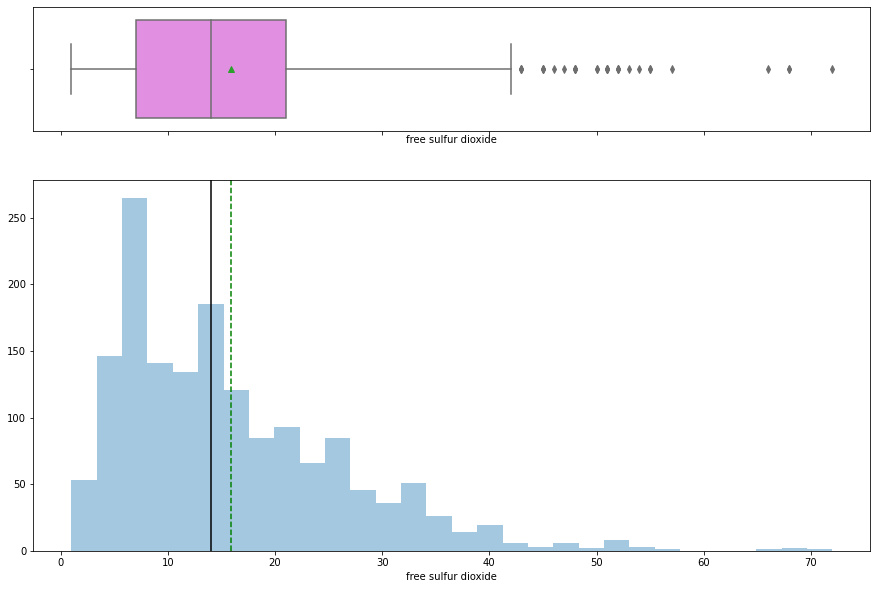

In [15]:
histogram_boxplot(data['free sulfur dioxide'])

* Distribution of free sulphur dioxide sis skewed to right.
* From boxplot, we can see that there are outliers -  some wines have high free sulphur dioxide concentration.

### Observations on total sulfur dioxide

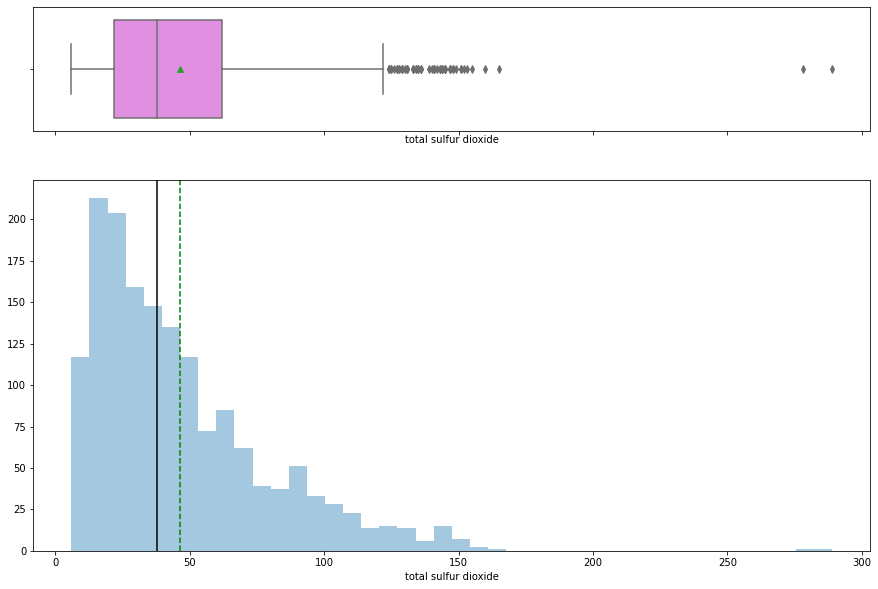

In [16]:
histogram_boxplot(data['total sulfur dioxide'])

* Total sulphur dioxide concentration is right-skewed. 
* From boxplot, we can see that there are outliers in this variables having higher total sulphur dioxide concentration that others, wines with more than ~120 total sulphur dioxide concentration are being considered as outlier in data.

### Observations on density

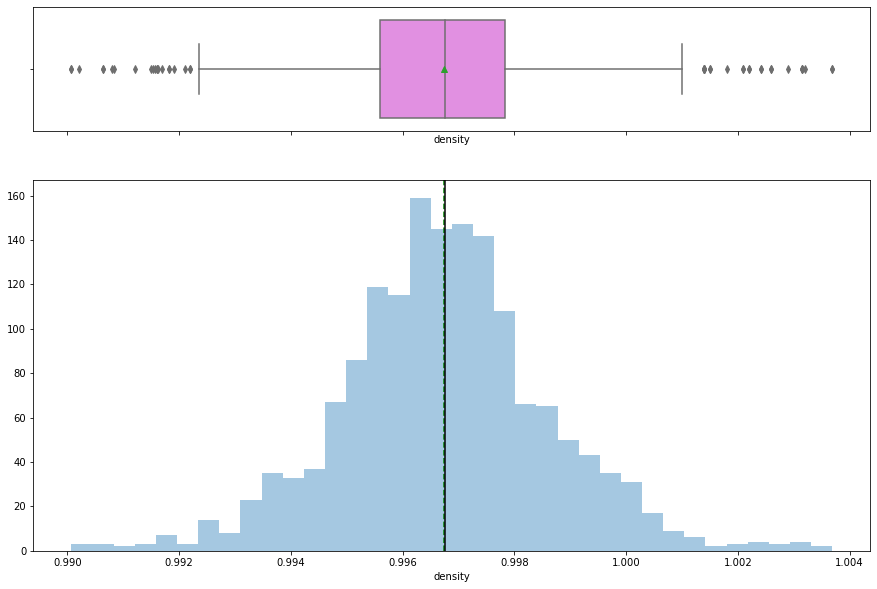

In [17]:
histogram_boxplot(data['density'])

* Distribution of density follows a normal distribution with mean and median equal to ~0.997.
* From boxplot, we can see that there are outliers on both the sides of whiskers indicating some wines are too dense and some very less dense.

### Observations on pH

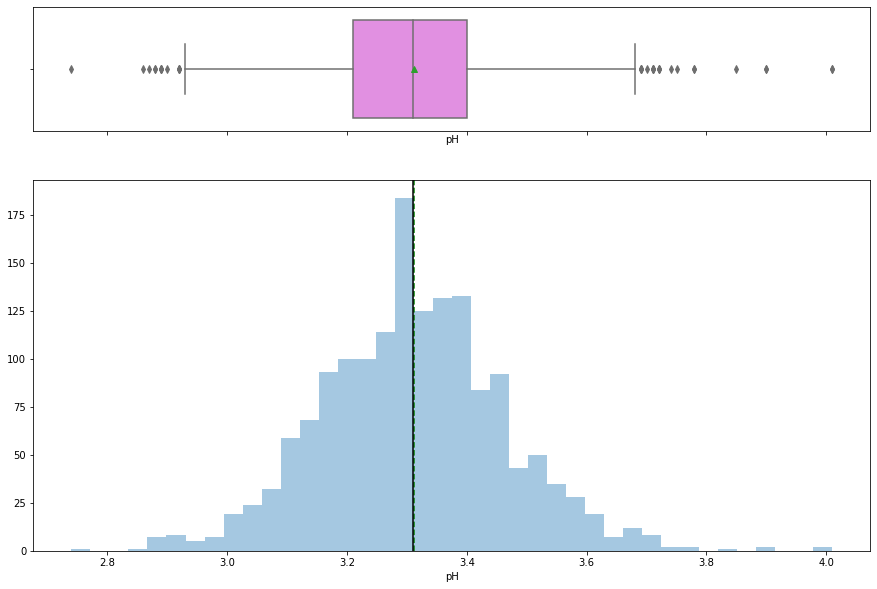

In [18]:
histogram_boxplot(data['pH'])

* Distribution of pH looks normally distributed with mean and median equal to ~3.3, most wines have a pH value around 3.3 (acidic in nature).
* From boxplot, we can see that there are outliers on both the sides of whiskers.

### Observations on sulphates

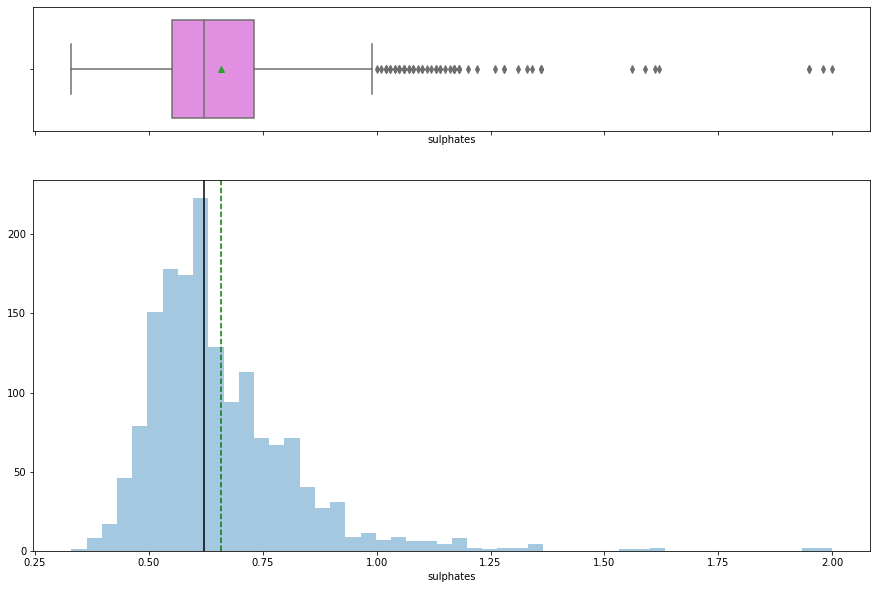

In [19]:
histogram_boxplot(data['sulphates'])

* sulphates which acts as antimicrobial and antioxidant has a right-skew, some wines have higher concentration of sulphates that the others.
* From boxplot, we can see that there are outliers in this variable - some wines with a very high sulphates than others, can possibly be highly rated wines as sulphates would help them in preserving them for a longer time, wines with more tha ~1 sulphates concentration are being considered as outliers in data.

### Observations on alcohol

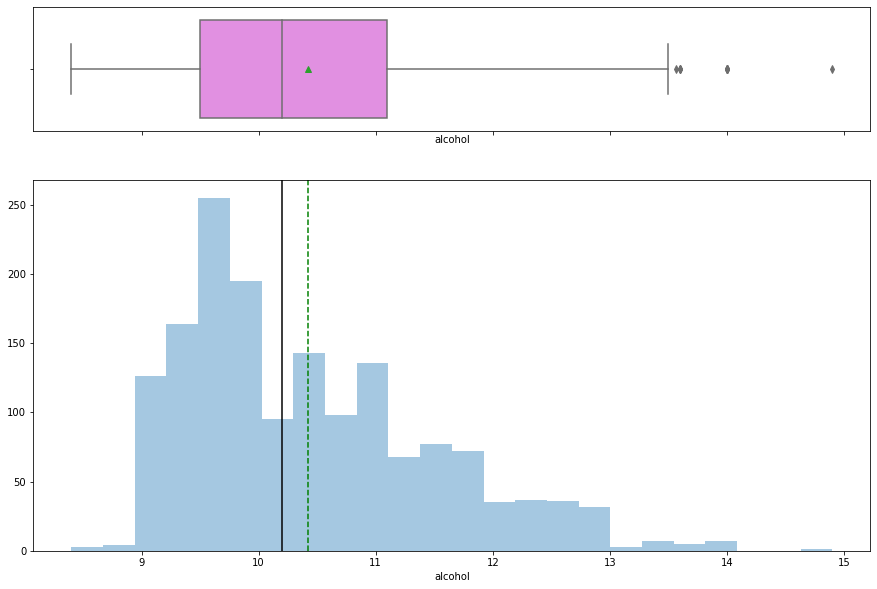

In [20]:
histogram_boxplot(data['alcohol'])

* Most wines have 9% to 10% of alcohol.
* From boxplot, we can see that the wines having more than 13% of alcohol are outliers.

In [21]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

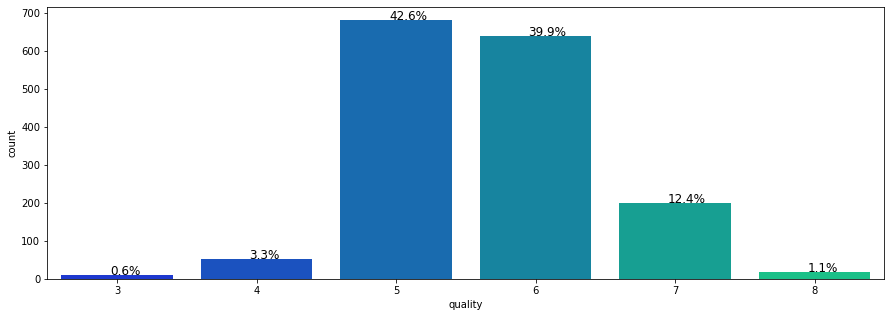

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["quality"],palette='winter')
perc_on_bar(ax,data["quality"])

* Most of the wines are rated either 5 or 6 out of 10.
* There are very less records for 3, 4, and 8 rated wines.
* To create a more balanced target variable we can combine records to create two broad categories - low quality wines and high quaity:  2-6 rating = low quality, 7-8 = high quality.

In [23]:
# defining bins
bins = (2, 6, 8)
# defining labels
labels = ['low', 'high']

data['quality_bins'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [24]:
data['quality_bins'].value_counts()

low     1382
high     217
Name: quality_bins, dtype: int64

## Bivariate Analysis

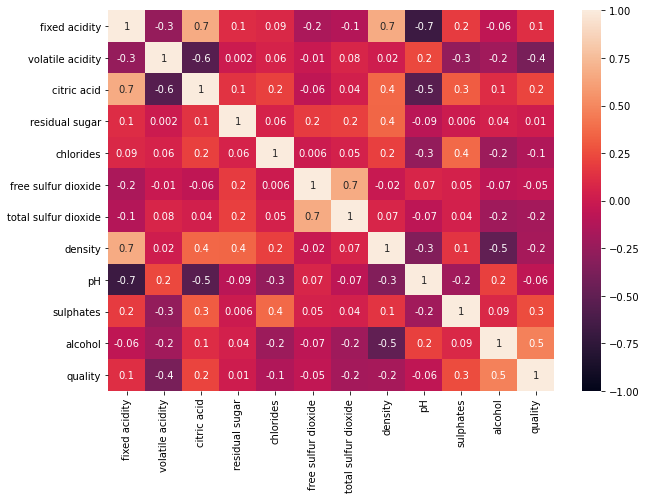

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* Fixed acidity has a strong correlation with citric acid and density.
* total sulphur dioxide and free sulfur dioxide have a strong correlation.
* quality shows a moderate correlaion with alcohol.

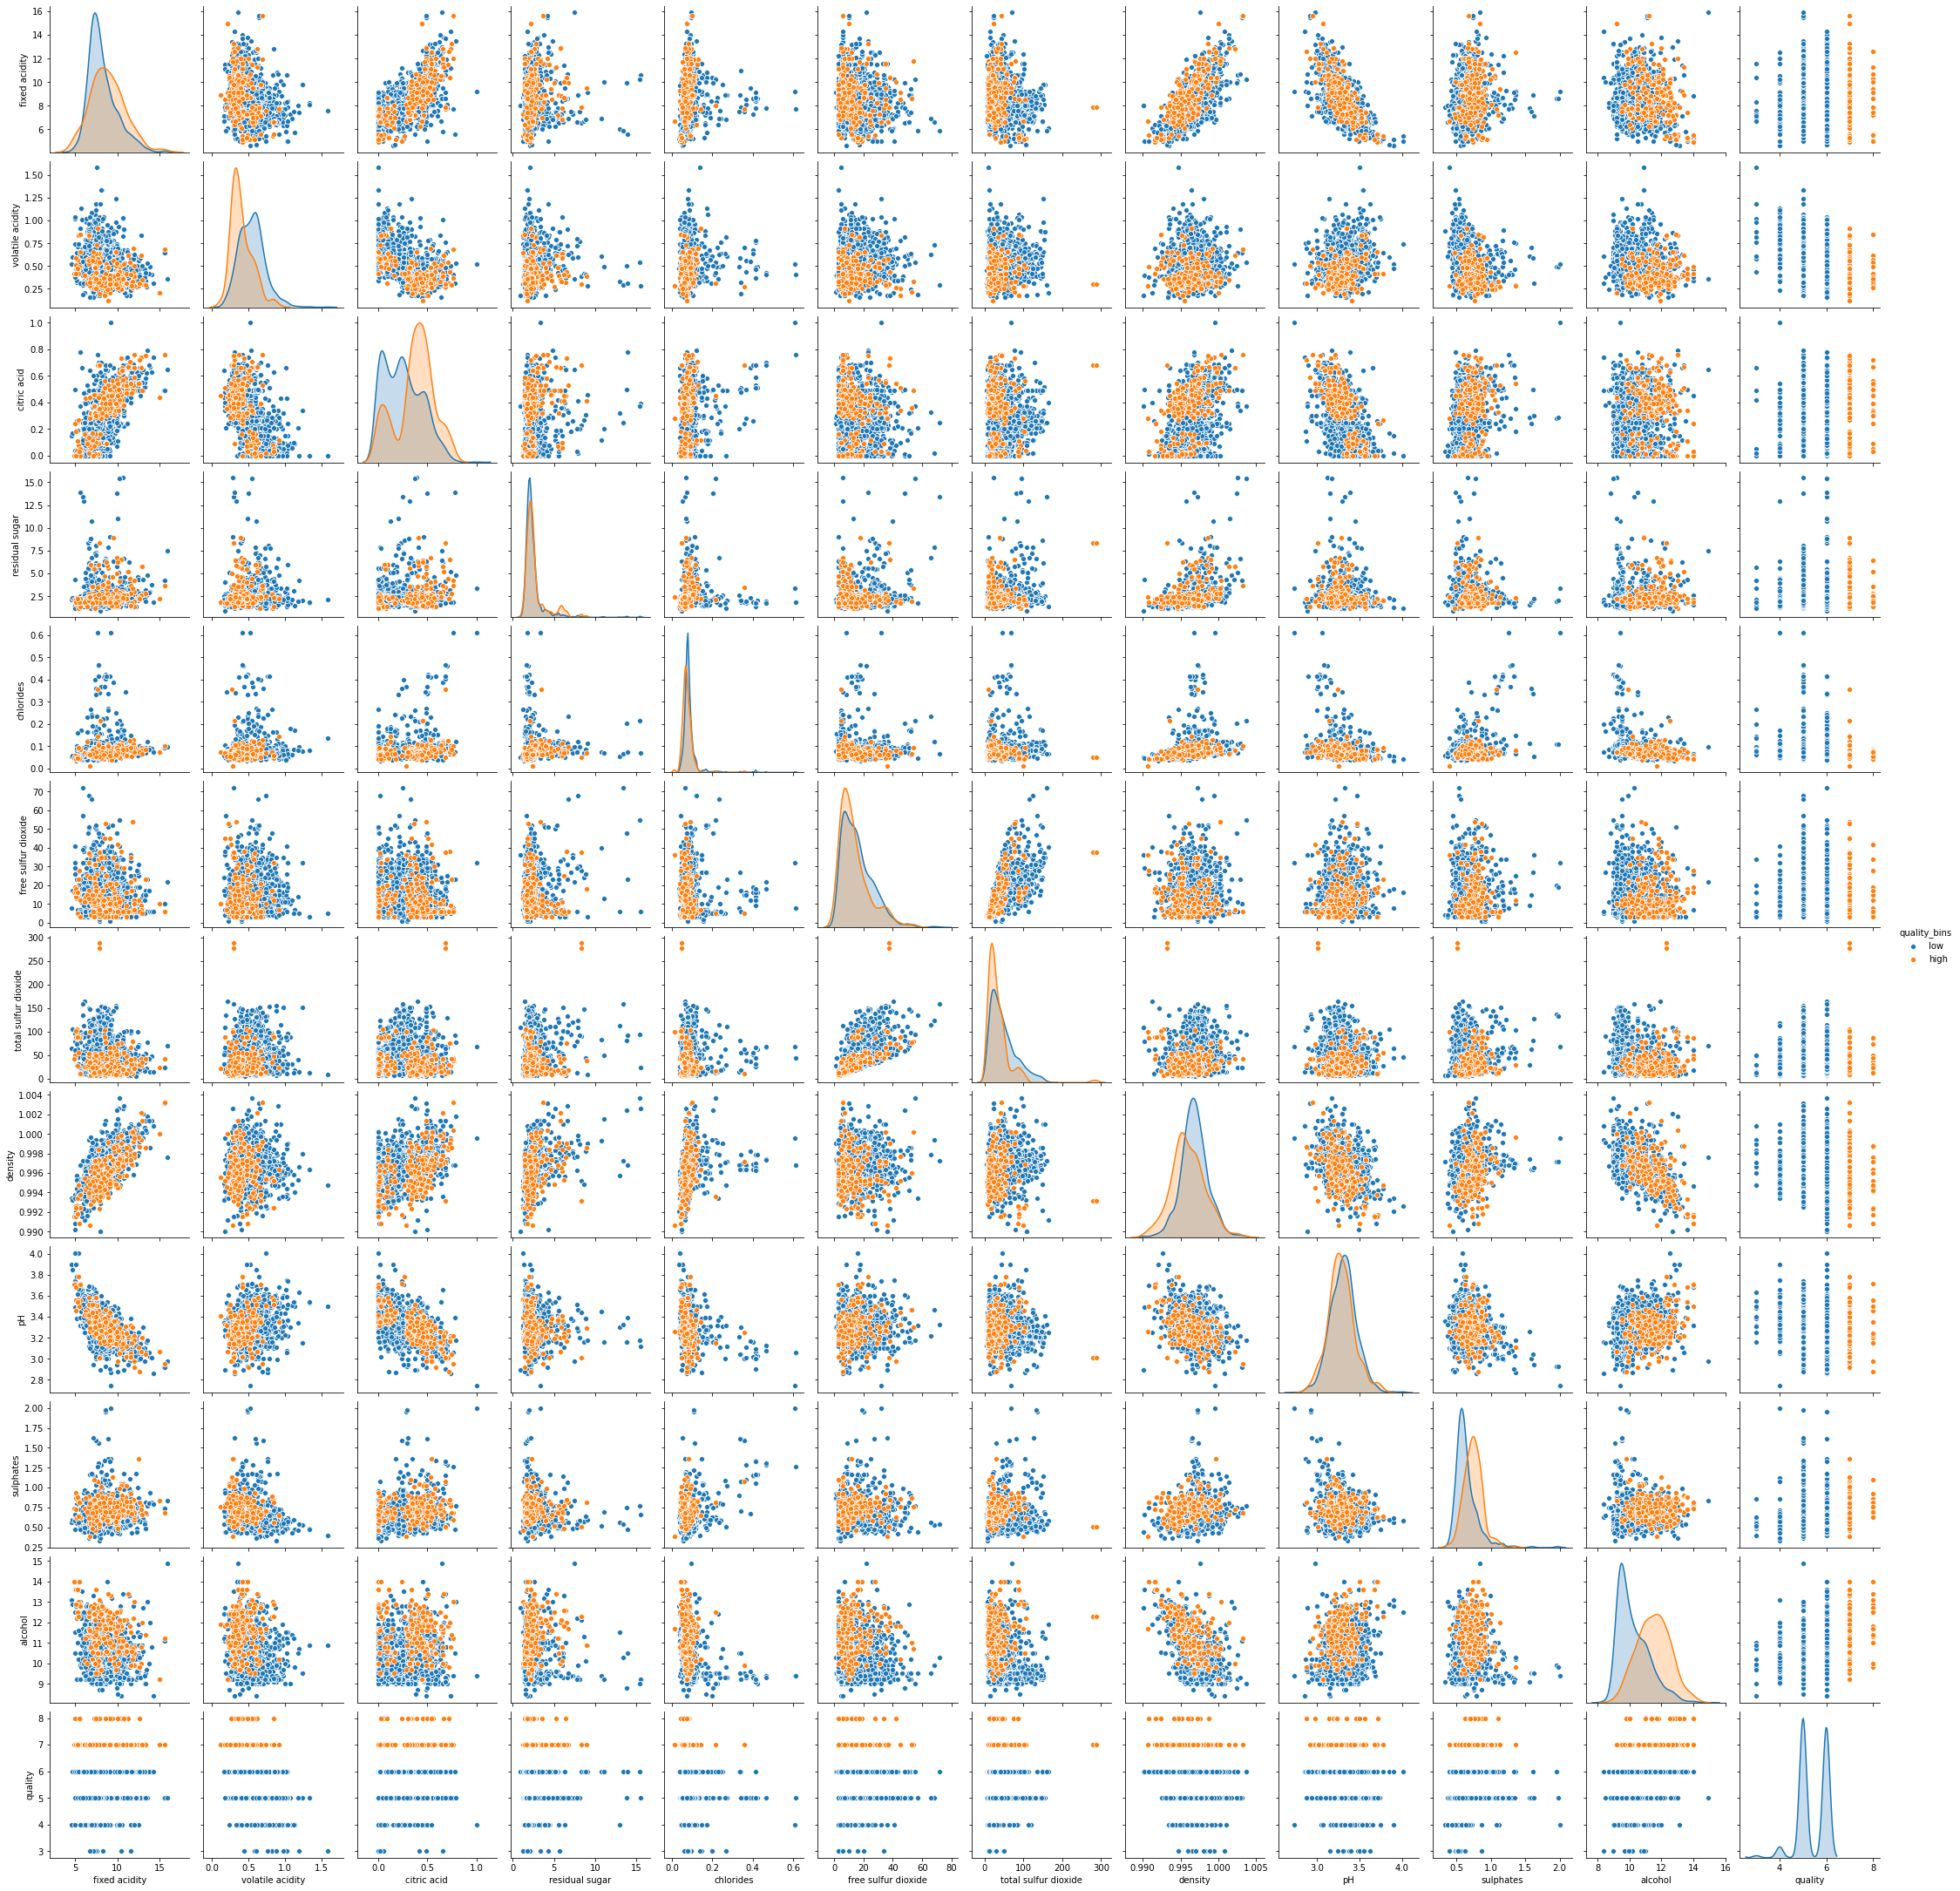

In [26]:
sns.pairplot(data,hue='quality_bins')
plt.show()

* Variables like citric acis, volatile acidity, sulphates and alcohol separates the two classes well, let' explore them further.

### Quality vs acidity

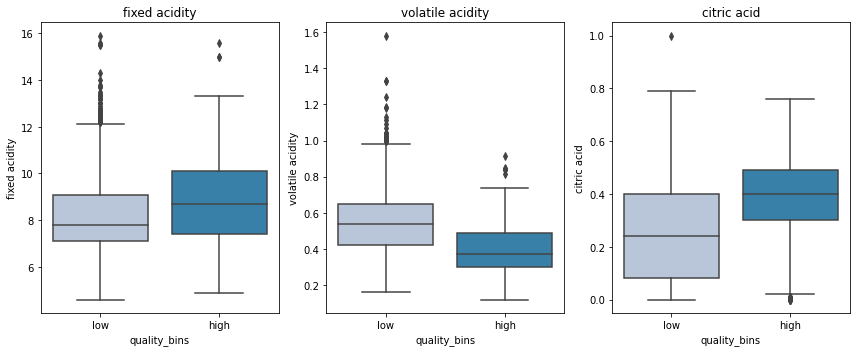

In [27]:
cols = data[['fixed acidity', 'volatile acidity', 'citric acid']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['quality_bins'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Highly rated wines have higher fixed acidity and citric acid and lower volatile acidity.

### Quality vs sulfur

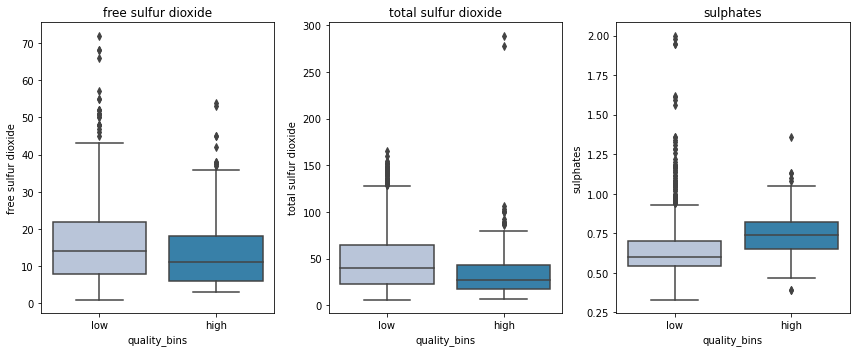

In [28]:
cols = data[['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['quality_bins'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Highly rated wines have less concentration of free sulphur dioxide and total suphur dioxide while higher sulphates that helps in preserving them for a longer period.

### Quality vs chlorides

In [29]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data['quality_bins'],x,palette="PuBu")
    plt.show()

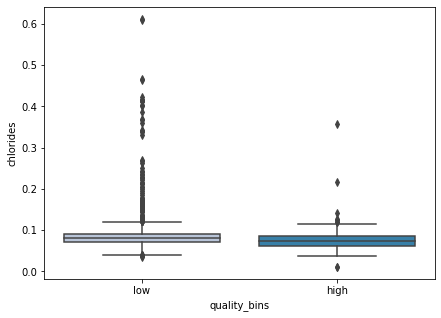

In [30]:
boxplot(data['chlorides'])

* There's not much differnce between the differntly rated wines - chlorides concentration is almost similar in all types of wines.
* It is quite difficult to make an interpretation here, let's turn off the outliers and visualize again.

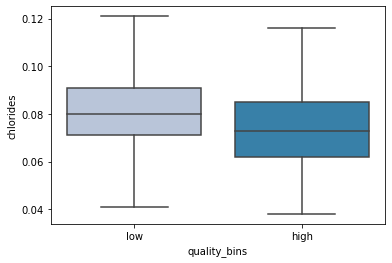

In [31]:
sns.boxplot(data['quality_bins'],data['chlorides'],showfliers=False,palette='PuBu');

* Highly rated wines have lower concentration of chlorides in them.

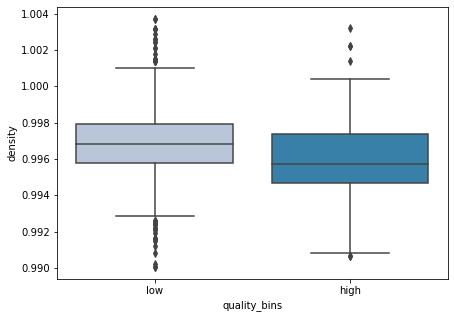

In [32]:
boxplot(data['density'])

* Highy rated wines have lesser density that is lesser amount of water added to it.

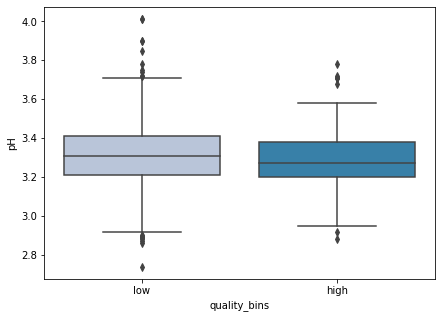

In [33]:
boxplot(data['pH'])

* Better the wine lesser is the pH value - more acidic.

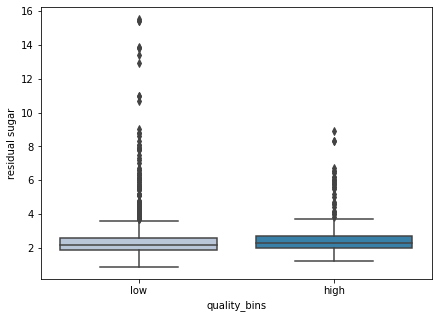

In [34]:
boxplot(data['residual sugar'])

* As we observed earlier some wines have high residual sugar, such wines are rated lower.

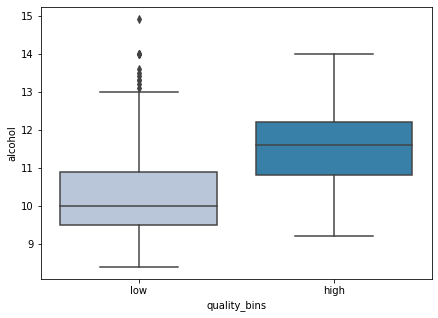

In [35]:
boxplot(data['alcohol'])

* Alcohol content plays a huge role in rating a wine highly.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built  on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

## Split Data

In [36]:
X = data.drop(['quality_bins','quality'],axis=1)
y = data['quality_bins'].apply(lambda x : 0 if x=='low' else 1 )

In [37]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1119, 11) (480, 11)


In [38]:
y.value_counts(1)

0    0.86429
1    0.13571
Name: quality_bins, dtype: float64

In [39]:
y_test.value_counts(1)

0    0.864583
1    0.135417
Name: quality_bins, dtype: float64

**Let's define function to provide metric scores(accuracy) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [40]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [41]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

In [42]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [43]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

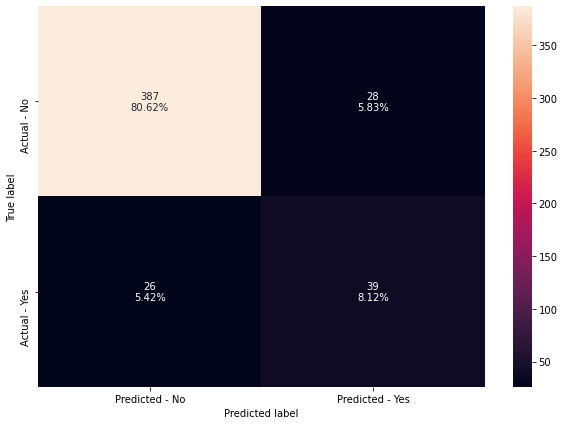

In [44]:
make_confusion_matrix(dtree,y_test)

In [45]:
dtree_acc = get_accuracy_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8875


* Decision tree has performed very well but it is overfitting on train data.

### Bagging Classifier

In [46]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

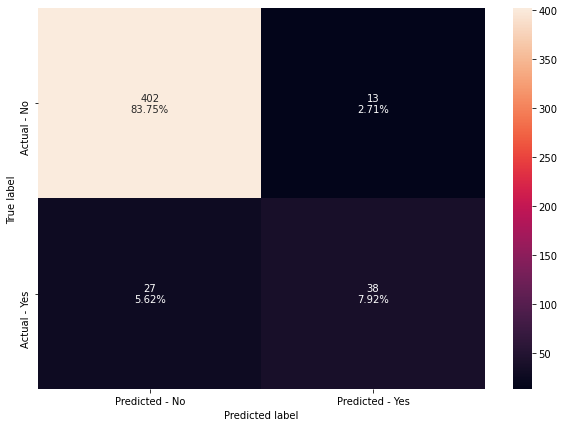

In [47]:
make_confusion_matrix(bagging,y_test)

In [48]:
bagging_acc = get_accuracy_score(bagging)

Accuracy on training set :  0.9830205540661304
Accuracy on test set :  0.9166666666666666


* Bagging classifier has performed well and there is less overfiiting than decision tree.

### Random Forest

In [49]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

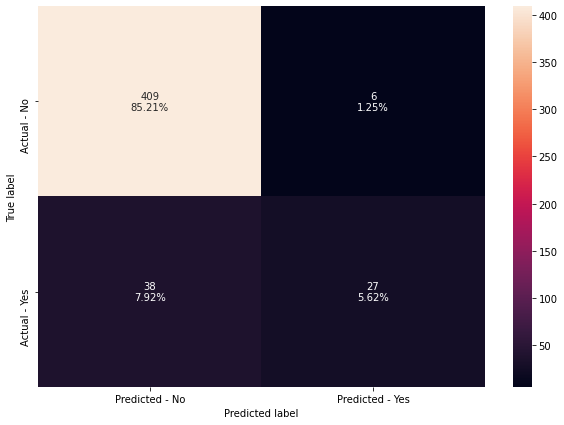

In [50]:
make_confusion_matrix(rf,y_test)

In [51]:
rf_acc = get_accuracy_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9083333333333333


* Random forest is performing well but there is overfiiting.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1]
             }


# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15,
                       min_impurity_decrease=1e-05, min_samples_leaf=5,
                       random_state=1)

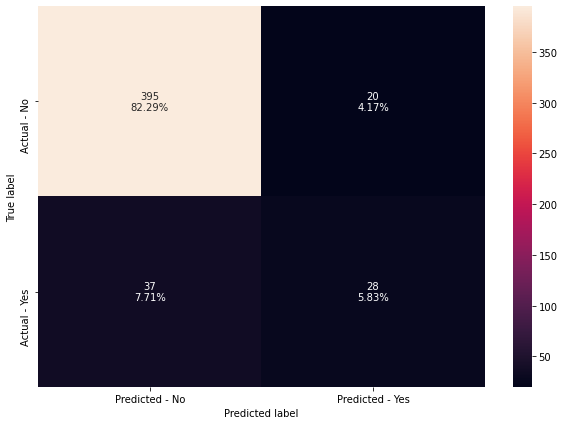

In [54]:
make_confusion_matrix(dtree_estimator,y_test)

In [55]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)

Accuracy on training set :  0.9249329758713136
Accuracy on test set :  0.88125


* Overfitting of decision tree has reduced and we have a generalized performance.

**Tuning Bagging Classifier**

In [56]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, cv = 5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]})

In [57]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

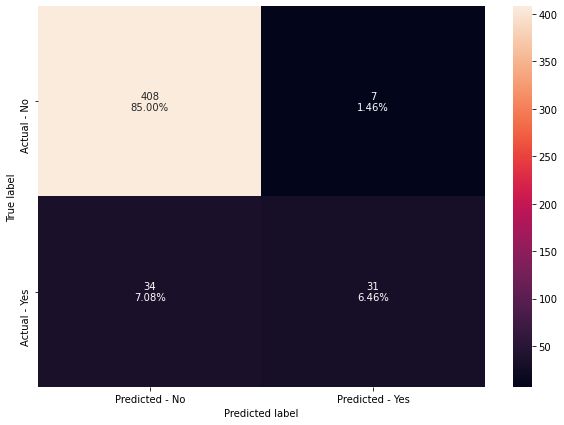

In [58]:
make_confusion_matrix(bagging_estimator,y_test)

In [59]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9145833333333333


* There is not much improvement in Bagging classifier.

**Tuning Random Forest**

In [60]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from
parameters = {  
                'max_features': ['sqrt','log2','auto'],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': list(np.linspace(10, 50, 10, dtype = int))}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=1)

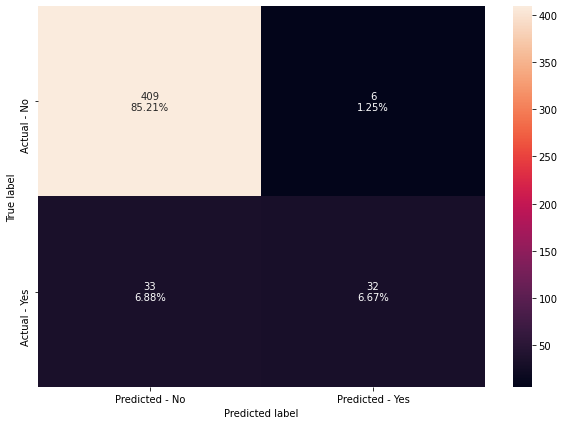

In [61]:
make_confusion_matrix(rf_estimator,y_test)

In [62]:
tuned_rf_acc = get_accuracy_score(rf_estimator)

Accuracy on training set :  0.9991063449508489
Accuracy on test set :  0.91875


* Overfitting is still there in Random Forest and the performance is equivalent to initial random forest model.

### AdaBoost Classifier

In [63]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

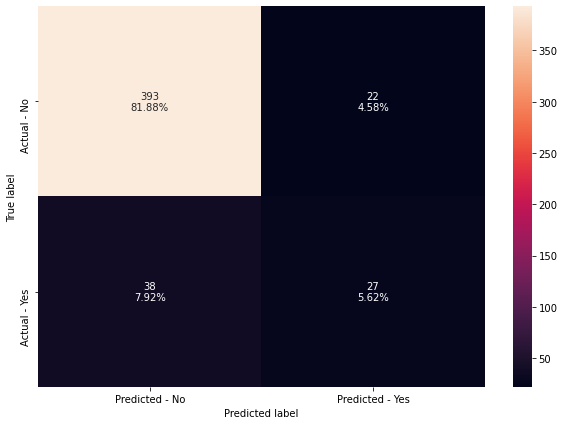

In [64]:
make_confusion_matrix(abc,y_test)

In [65]:
#Using above defined function to get accuracy on train and test set
abc_acc = get_accuracy_score(abc)

Accuracy on training set :  0.9133154602323503
Accuracy on test set :  0.875


* Adaboost classifier is giving a good and generalized performance on train and test.

### Gradient Boosting Classifier

In [66]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

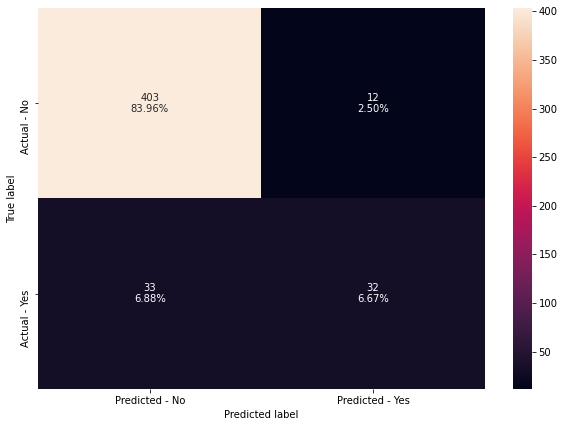

In [67]:
make_confusion_matrix(gbc,y_test)

In [68]:
#Using above defined function to get accuracy on train and test set
gbm_acc = get_accuracy_score(gbc)

Accuracy on training set :  0.9696157283288651
Accuracy on test set :  0.90625


* Gradient boosting classifier is giving a good and generalized performance on train and test.

### XGBoost Classifier

In [69]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

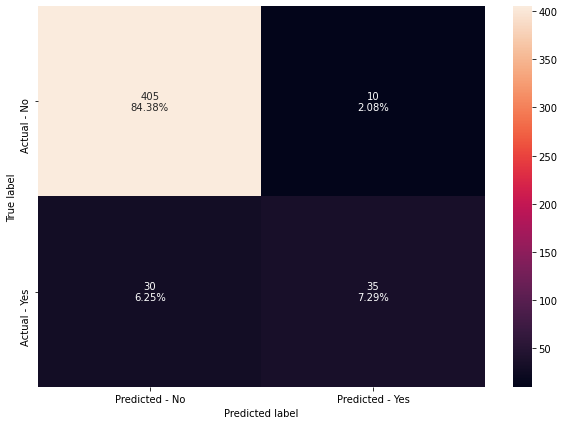

In [70]:
make_confusion_matrix(xgb,y_test)

In [71]:
#Using above defined function to get accuracy on train and test set
xgb_acc = get_accuracy_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9166666666666666


* XGBoost is performing well on data but there's overfitting.

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [72]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=70, random_state=1)

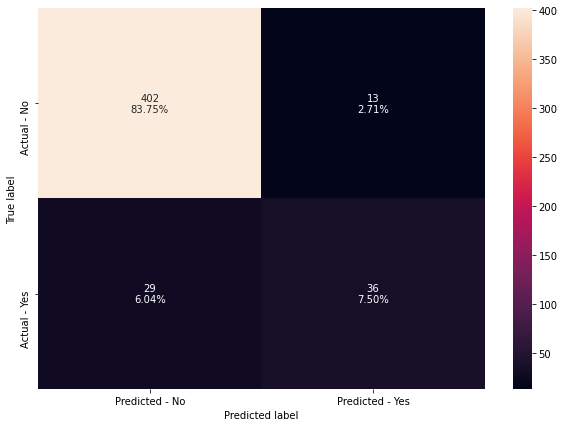

In [73]:
make_confusion_matrix(abc_tuned,y_test)

In [74]:
#Using above defined function to get accuracy on train and test set
tuned_abc_acc = get_accuracy_score(abc_tuned)

Accuracy on training set :  0.9910634495084897
Accuracy on test set :  0.9125


* After tuning the accuracy has increased for adaboost classifier but now there's overfitting.

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for intial predictions**

In [75]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

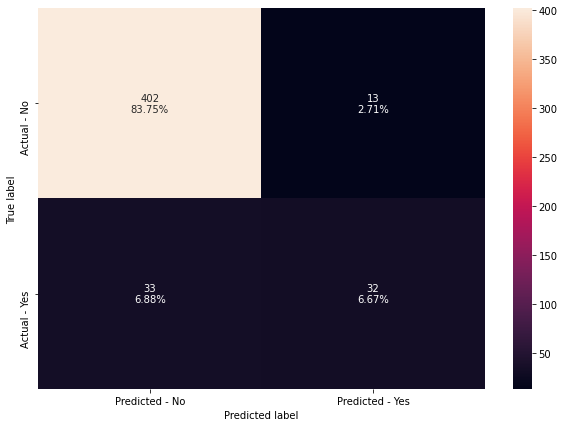

In [76]:
make_confusion_matrix(gbc_init,y_test)

In [77]:
#Using above defined function to get accuracy on train and test set
gbc_acc_init = get_accuracy_score(gbc_init)

Accuracy on training set :  0.9615728328865059
Accuracy on test set :  0.9041666666666667


* Gradient boosting with Adaboost as base estimator has given good results.

In [78]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

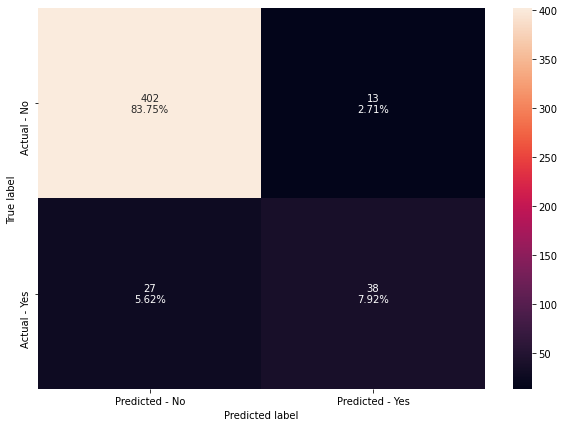

In [79]:
make_confusion_matrix(gbc_tuned,y_test)

In [80]:
#Using above defined function to get accuracy on train and test set
tuned_gbc = get_accuracy_score(gbc_tuned)

Accuracy on training set :  0.9937444146559428
Accuracy on test set :  0.9166666666666666


* After tuning Gradient boost we have increased the accuracy by 1%  on test set.

### XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.

In [81]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [82]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

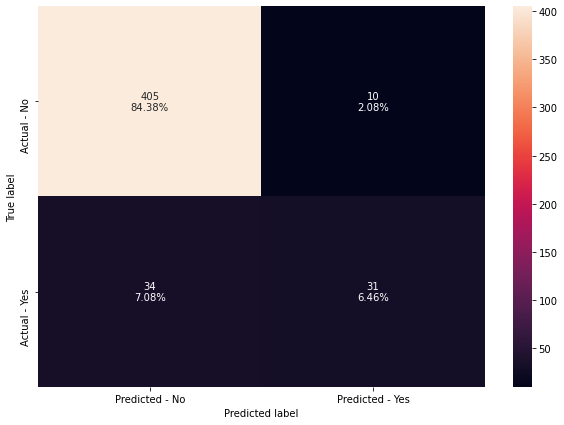

In [83]:
make_confusion_matrix(xgb_tuned,y_test)

In [84]:
#Using above defined function to get accuracy on train and test set
tuned_xgb_acc = get_accuracy_score(xgb_tuned)

Accuracy on training set :  0.9919571045576407
Accuracy on test set :  0.9083333333333333


* There's not much difference in the results of XGBoost after tuning as compared to the initial XGBoost model.

### Comparing all the models

In [85]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_estimator,rf,rf_estimator,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned]
# defining empty lists to add train and test results
acc_train = []
acc_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

In [86]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest','Adaboost Classifier',
                                          'Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy
0,Decision Tree,1.000000,0.887500
1,Tuned Decision Tree,0.924933,0.881250
2,Bagging Classifier,0.983021,0.916667
3,Tuned Bagging Classifier,1.000000,0.914583
4,Random Forest,1.000000,0.908333
5,Tuned Random Forest,0.999106,0.918750
6,Adaboost Classifier,0.913315,0.875000
7,Gradient Boosting Classifier,0.969616,0.906250
8,XGBoost classifier,1.000000,0.916667
9,Tuned Adaboost Classifier,0.991063,0.912500


* All model have performed well on training data and have been able to give similar performance on test data to some extent.
* Gradient Boosting classifier however has given the most generalized performance among all the other models.

### Feature importance of Gradient Boosting Classifier

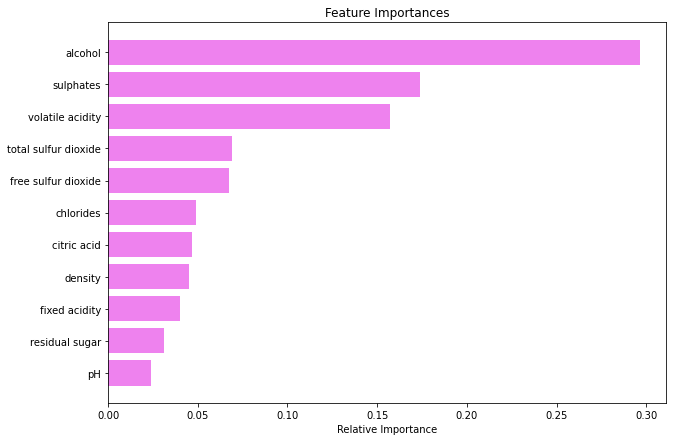

In [87]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Alcohol, Sulphate and volatile acidity are the three most important features to predict the Wine Quality.

### Conclusion-
A highly rated wine has following features in comparison to the low rated wines - 
* Higher concentration of alcohol.
* A fairly higher concentration of sulphates
* Less volatile acidity
* Higher fixed acidity.
* Higher citric acid concentration.
* Fair concentration of total suphur dioxide and free sulphur dioxide.
* Less chlorides, density and pH levels.
